# DEFINIM LA FUNCIÓ DE CLASSIFICACIÓ

In [16]:
def classificacio(p,K): 
    #Afegim el punt a classificar( p ): 
    X_clas = np.append(X_train, X_test[p:(p+1),:],axis=0)
    # Estandaritzem les 2 variables del X_clas
    X_clas=preprocessing.scale(X_clas)

    # Fem la matriu de distàncies
    dist=np.zeros(shape=(num_objectes_train+1,num_objectes_train+1), dtype=float)
    for i in range(num_objectes_train+1):
        for j in range(num_objectes_train+1):
                dist[i,j]=np.sqrt(np.sum((X_clas[i,:]-X_clas[j,:])**2))
    #Determinem els índex dels K més propers
    dist_sort=dist.argsort(axis=1)[:,1:(K+1)]
    # Creem la matriu d'adjacències amb mutual
    adj=np.zeros(shape=(num_objectes_train+1,num_objectes_train+1), dtype=float)
    for i in range(num_objectes_train+1):
       for j in range(K):
           if i in dist_sort[dist_sort[i,j],:]:
               adj[i,dist_sort[i,j]]=1
    # Assignar la classe al nou exemple
    #index_clas=adj[-1:,0:num_objectes_train].astype(bool)
    index_clas=adj[-1,:-1].astype(bool)
    #index_clas=index_clas[0,]
    if True in index_clas:
        u, c = np.unique(y_train[index_clas], return_counts=True)
        r=u[c.argmax()]
    else:
        r='Unclassified'
    return (r)

# PREPAREM LES DADES 

Carreguem les llibreries que necessitem

In [17]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
import networkx as nx
from sklearn import preprocessing

Assignem noms de columnes 
i Llegim les dades de la url a un dataframe de pandas i el mostrem

In [18]:
import requests
import io

In [19]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
s=requests.get(url).content
dataset=pd.read_csv(io.StringIO(s.decode('utf-8')),names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Separem les característiques (columnes x) de les classes (columna y) Per x agafem només 2 columnes  

In [20]:
X = dataset.iloc[:, 0:2].values  
y = dataset.iloc[:, 4].values  
print(X.shape)
print(y.shape)

(150, 2)
(150,)


Traiem duplicats

In [21]:
dup=np.unique(X,return_index=True,axis=0)
X=X[dup[1],:]
y=y[dup[1]]
print(X.shape)
print(y.shape)

(116, 2)
(116,)


Seleccionem a l'atzar les files que suposem classificades i retenim la resta que considerem no classificades

In [22]:
from sklearn.model_selection import train_test_split
import random
random.seed(111)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train.shape
num_objectes_train=X_train.shape[0]
num_objectes_test=X_test.shape[0]
print(num_objectes_train)
print(num_objectes_test)
#87 flors train i 29 per a clasificar.

87
29


# Classificació de tots els punts del test

In [23]:
K=4
y_class=np.empty(num_objectes_test, dtype=object)
for i in range(num_objectes_test):
    y_class[i]=classificacio(i,K)
#Busco clasificar 29 flors amb 4 k veins mutuals.

In [24]:
y_class #29 clasificacions fetes per a mi.

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Unclassified', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor'], dtype=object)

In [25]:
y_test #Clasificacions de veritat

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [26]:
y_class == y_test #Veig que casi tots els tinc bé.

array([ True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
       False,  True])

Mirem diferents evaluacions del test

In [27]:
from sklearn.metrics import accuracy_score
#Tinc una precisió del 79%
accuracy_score(y_class,y_test, normalize=True, sample_weight=None)

0.7931034482758621

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_class,y_test)

array([[ 9,  0,  0,  0],
       [ 0, 10,  4,  0],
       [ 0,  1,  4,  0],
       [ 0,  1,  0,  0]], dtype=int64)

Fem diferents k's i dibuixem la accuracy

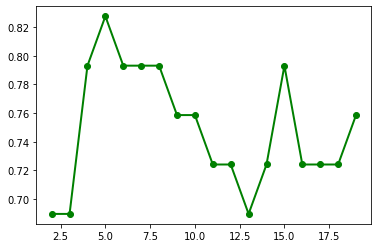

In [29]:
ks=range(2,20)
accuracies=np.empty(len(ks), dtype=object)
l=0
for j in ks:
    K=j
    y_class=np.empty(num_objectes_test, dtype=object)
    for i in range(num_objectes_test):
        y_class[i]=classificacio(i,K)
    accuracies[l]=accuracy_score(y_class,y_test, normalize=True, sample_weight=None)
    l=l+1

plt.plot(ks,accuracies, 'go-', label='line 1', linewidth=2)